# Exercise: Predictive Maintenance of Turbofan Engines

As we saw, we can apply a variety of machine learning approaches to implement predictive maintenance. This open-ended exercise will give you the opportunity to experiment on a realistic data set.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Turbofan3_Labelled.gif" width="400" >

## Preamble

In [1]:
import ai_dojo
ai_dojo.setup_plot_style(dark=True)
ai_dojo.setup_slide_style(theme="night")

## The NASA Turbofan Engine Degradation Dataset

[**Source: Kaggle**](https://www.kaggle.com/datasets/behrad3d/nasa-cmaps?resource=download)

- The NASA Turbofan Engine Degradation Simulation (TURBOFAN) dataset is a set run-to-failure data for turbofan engines.
- The data set contains time series of 21 sensor measurements and 3 operational settings collected from 100 simulated engines over 100 cycles for each engine.     
  - The operational settings were varied to simulate different engine operating conditions.
  - The sensor measurements were obtained by different sensors located around the engine. 





### Exploring the Data

In [3]:
from pathlib import Path
import pandas 

In [4]:
data_dir = Path("../.assets/data/turbofan")

In [5]:
!ls -la {data_dir}

total 88656
drwxr-xr-x  17 cls  staff       544 Nov 21 12:03 .
drwxr-xr-x  20 cls  staff       640 Nov 21 12:02 ..
-rw-r--r--   1 cls  staff    434158 Nov 21 12:03 Damage Propagation Modeling.pdf
-rw-r--r--   1 cls  staff       429 Nov 21 12:03 RUL_FD001.txt
-rw-r--r--   1 cls  staff      1110 Nov 21 12:03 RUL_FD002.txt
-rw-r--r--   1 cls  staff       428 Nov 21 12:03 RUL_FD003.txt
-rw-r--r--   1 cls  staff      1084 Nov 21 12:03 RUL_FD004.txt
-rw-r--r--   1 cls  staff      2442 Nov 21 12:03 readme.txt
-rw-r--r--   1 cls  staff   2228855 Nov 21 12:03 test_FD001.txt
-rw-r--r--   1 cls  staff   5734587 Nov 21 12:03 test_FD002.txt
-rw-r--r--   1 cls  staff   2826651 Nov 21 12:03 test_FD003.txt
-rw-r--r--   1 cls  staff   6957759 Nov 21 12:03 test_FD004.txt
-rw-r--r--   1 cls  staff   3515356 Nov 21 12:03 train_FD001.txt
-rw-r--r--   1 cls  staff   9082480 Nov 21 12:03 train_FD002.txt
-rw-r--r--   1 cls  staff   4213862 Nov 21 12:03 train_FD003.txt
-rw-r--r--   1 cls  staff  10350705 Nov 2

#### Training Data

The training data set contains data of simulated runs to failure. At the end of the time series, the engine has failed. 

In [8]:
header = [
    "unit_number",
    "time_in_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3",
    "sensor_measurement_1",
    "sensor_measurement_2",
    "sensor_measurement_3",
    "sensor_measurement_4",
    "sensor_measurement_5",
    "sensor_measurement_6",
    "sensor_measurement_7",
    "sensor_measurement_8",
    "sensor_measurement_9",
    "sensor_measurement_10",
    "sensor_measurement_11",
    "sensor_measurement_12",
    "sensor_measurement_13",
    "sensor_measurement_14",
    "sensor_measurement_15",
    "sensor_measurement_16",
    "sensor_measurement_17",
    "sensor_measurement_18",
    "sensor_measurement_19",
    "sensor_measurement_20",
    "sensor_measurement_21",
    "empty_01",
    "empty_02",
]

In [9]:
data_train = pandas.read_csv(
    data_dir / "train_FD001.txt",
    sep=" ",
    header=None,
)

data_train.columns = header

data_train = data_train.drop(labels=["empty_01", "empty_02"], axis="columns")

data_train

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [10]:
data_one = data_train.query("unit_number == 3")
data_one

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
479,3,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,14.62,...,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100.0,38.96,23.3205
480,3,2,-0.0010,0.0000,100.0,518.67,642.66,1587.04,1398.62,14.62,...,522.03,2388.01,8137.38,8.3949,0.03,390,2388,100.0,39.07,23.4369
481,3,3,0.0013,-0.0002,100.0,518.67,642.07,1580.75,1401.10,14.62,...,522.16,2388.01,8137.20,8.3820,0.03,393,2388,100.0,39.03,23.3162
482,3,4,0.0008,-0.0002,100.0,518.67,642.50,1580.12,1395.76,14.62,...,522.31,2388.07,8139.35,8.3940,0.03,391,2388,100.0,38.94,23.4901
483,3,5,0.0020,0.0004,100.0,518.67,641.97,1581.48,1394.05,14.62,...,522.00,2388.03,8135.99,8.4233,0.03,391,2388,100.0,38.90,23.4190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3,175,-0.0030,0.0004,100.0,518.67,643.15,1603.74,1424.17,14.62,...,520.34,2388.14,8238.86,8.5066,0.03,396,2388,100.0,38.49,22.9909
654,3,176,-0.0008,0.0002,100.0,518.67,643.93,1595.61,1438.51,14.62,...,520.91,2388.12,8251.82,8.5245,0.03,396,2388,100.0,38.49,23.0656
655,3,177,-0.0041,-0.0002,100.0,518.67,643.68,1601.21,1423.50,14.62,...,520.19,2388.16,8249.86,8.5286,0.03,397,2388,100.0,38.37,23.0336
656,3,178,-0.0010,0.0001,100.0,518.67,643.66,1606.50,1430.55,14.62,...,520.14,2388.12,8253.84,8.5351,0.03,399,2388,100.0,38.57,23.1323


<AxesSubplot: >

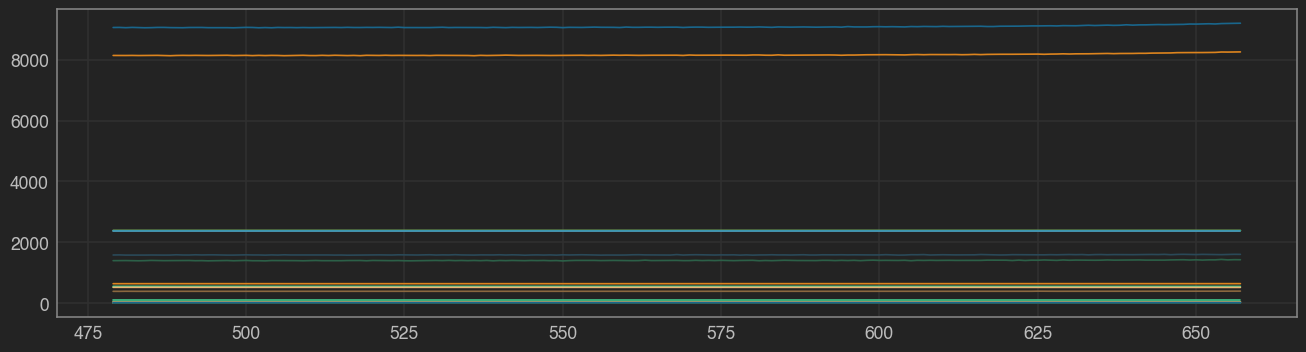

In [11]:
(
    data_one
    .filter([col for col in data_train.columns if col.startswith("sensor_measurement")])
    .plot(
        legend=False,
    )
)

### Test Data

In the test data, the time series end at some point before the engine fails. The goal is to predict the remaining useful life (RUL) of the engine.

In [ ]:
data_test = pandas.read_csv(
    data_dir / "test_FD001.txt",
    sep=" ",
    header=None,
)

data_test.columns = header

data_test = data_test.drop(labels=["empty_01", "empty_02"], axis="columns")

data_test

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


#### Labels

Files starting with `RUL` contain the **Remaining Useful Life** labels for the test data.

In [14]:
labels = pandas.read_csv(
    data_dir / "RUL_FD001.txt",
    header=None,
)

labels

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2022 [Christian Staudt](https://clstaudt.me)_